## Load Database

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sqlite3

DB_PATH = "nba.db"
conn = sqlite3.connect(DB_PATH)
cursor = conn.cursor()

print("Connected to the database successfully!")

Connected to the database successfully!


In [44]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in the database:")
for table in tables:
    print(f"\nTABLE: {table[0]}")
    schema_query = f"SELECT sql FROM sqlite_master WHERE type='table' AND name='{table[0]}';"
    cursor.execute(schema_query)
    create_statement = cursor.fetchone()[0]
    print(f"Schema for '{table[0]}':\n{create_statement}")

Tables in the database:

TABLE: players
Schema for 'players':
CREATE TABLE players (
            player_id TEXT PRIMARY KEY,
            full_name TEXT,
            birth_date TEXT,
            height TEXT,
            weight INTEGER,
            position TEXT,
            shoots TEXT,
            draft_year INTEGER,
            draft_round INTEGER,
            draft_pick INTEGER,
            draft_team TEXT
        )

TABLE: teams
Schema for 'teams':
CREATE TABLE teams (
            team_id TEXT PRIMARY KEY,
            team_name TEXT,
            conference TEXT,
            division TEXT
        )

TABLE: player_season_stats
Schema for 'player_season_stats':
CREATE TABLE player_season_stats (
            player_id TEXT,
            season INTEGER,
            team_id TEXT,
            games INTEGER,
            games_started INTEGER,
            minutes REAL,
            points REAL,
            rebounds REAL,
            assists REAL,
            per REAL,
            ts_pct REAL,


## Discovery Questions

### 1. How has league-wide pace changed from 2000 to 2025?


Pace by Season:
Season: 2000, Pace: 89.7
Season: 2001, Pace: 90.6
Season: 2002, Pace: 91.8
Season: 2003, Pace: 91.6
Season: 2004, Pace: 89.4
Season: 2005, Pace: 93.3
Season: 2006, Pace: 89.8
Season: 2007, Pace: 92.6
Season: 2008, Pace: 90.9
Season: 2009, Pace: 90.4
Season: 2010, Pace: 91.6
Season: 2011, Pace: 90.4
Season: 2012, Pace: 90.4
Season: 2013, Pace: 89.8
Season: 2014, Pace: 91.8
Season: 2015, Pace: 92.8
Season: 2016, Pace: 92.9
Season: 2017, Pace: 96.8
Season: 2018, Pace: 97.4
Season: 2019, Pace: 100.2
Season: 2020, Pace: 100.9
Season: 2021, Pace: 99.5
Season: 2022, Pace: 96.6
Season: 2023, Pace: 98.5
Season: 2024, Pace: 97.2
Season: 2025, Pace: 95.7


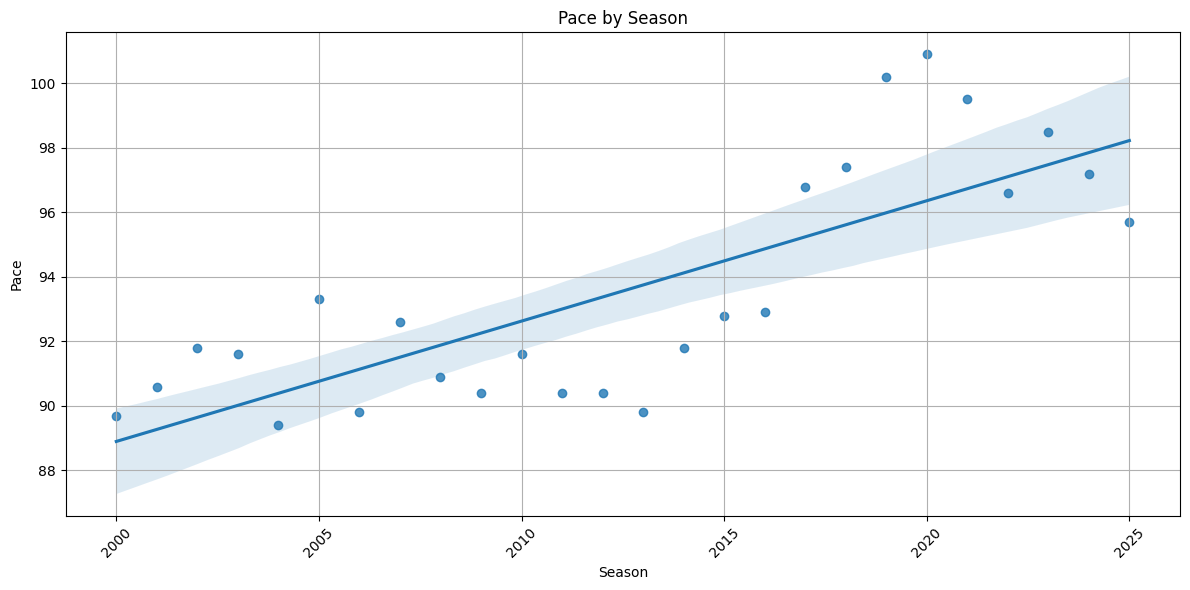

In [19]:
query = """
SELECT tss.pace AS pace, tss.season AS season
FROM team_season_stats tss
GROUP BY tss.season
ORDER BY tss.season;
"""

cursor.execute(query)
results = cursor.fetchall()
pace_by_season = [(season, pace) for pace, season in results]
print("\nPace by Season:")
for pace, season in results:
    print(f"Season: {season}, Pace: {pace}")
    

seasons = [season for season, _ in pace_by_season]
pace_values = [pace for _, pace in pace_by_season]
plt.figure(figsize=(12, 6))
sns.regplot(x=seasons, y=pace_values, marker='o')
plt.title('Pace by Season')
plt.xlabel('Season')
plt.ylabel('Pace')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### 2. Has home court advantage declined over time?


Home Win Percentage by Season:
Season: 2000, Home Win Percentage: 61.71%
Season: 2001, Home Win Percentage: 59.68%
Season: 2002, Home Win Percentage: 59.13%
Season: 2003, Home Win Percentage: 62.73%
Season: 2004, Home Win Percentage: 62.08%
Season: 2005, Home Win Percentage: 60.20%
Season: 2006, Home Win Percentage: 60.80%
Season: 2007, Home Win Percentage: 59.51%
Season: 2008, Home Win Percentage: 61.02%
Season: 2009, Home Win Percentage: 61.22%
Season: 2010, Home Win Percentage: 59.91%
Season: 2011, Home Win Percentage: 60.79%
Season: 2012, Home Win Percentage: 59.31%
Season: 2013, Home Win Percentage: 61.34%
Season: 2014, Home Win Percentage: 57.92%
Season: 2015, Home Win Percentage: 57.59%
Season: 2016, Home Win Percentage: 59.42%
Season: 2017, Home Win Percentage: 58.29%
Season: 2018, Home Win Percentage: 58.69%
Season: 2019, Home Win Percentage: 59.07%
Season: 2020, Home Win Percentage: 54.68%
Season: 2021, Home Win Percentage: 54.65%
Season: 2022, Home Win Percentage: 54.80%
Se

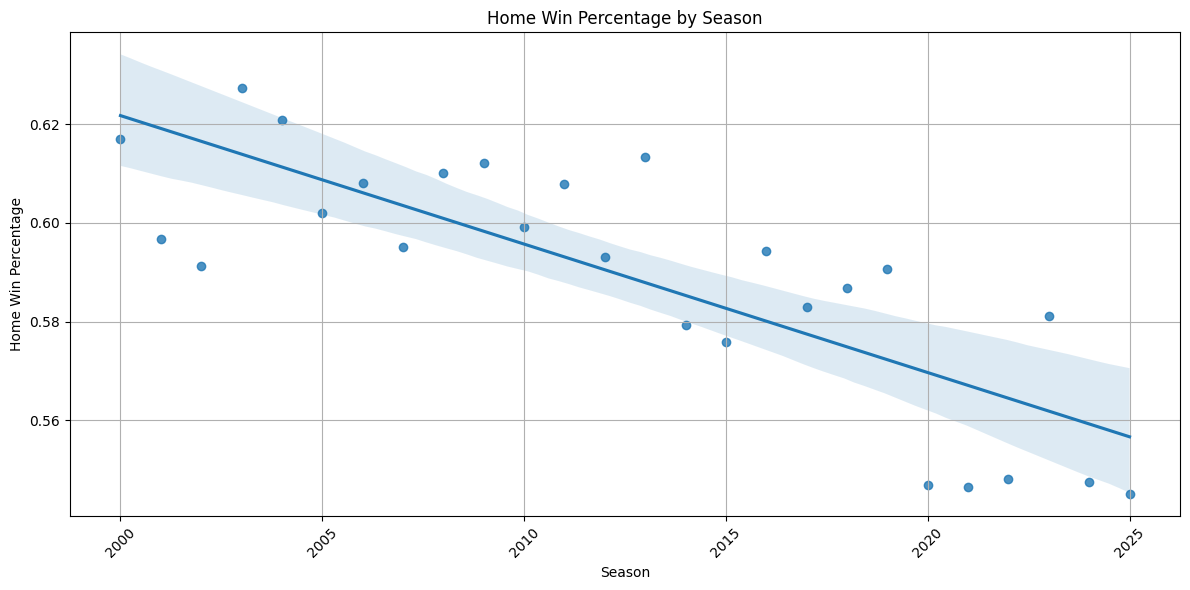

In [18]:
query = """
SELECT g.season AS season, AVG(g.home_win) AS home_win_percentage
FROM games g
GROUP BY g.season
ORDER BY g.season;
"""

cursor.execute(query)
results = cursor.fetchall()
season_win_percentages = [(season, home_win_percentage) for season, home_win_percentage in results]
print("\nHome Win Percentage by Season:")
for season, home_win_percentage in results:
    print(f"Season: {season}, Home Win Percentage: {home_win_percentage:.2%}")

seasons = [season for season, _ in season_win_percentages]
home_win_percentages = [home_win_percentage for _, home_win_percentage in season_win_percentages]
plt.figure(figsize=(12, 6))
sns.regplot(x=seasons, y=home_win_percentages, marker='o')
plt.title('Home Win Percentage by Season')
plt.xlabel('Season')
plt.ylabel('Home Win Percentage')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### 3. How has average scoring trended for Eastern vs Western conference teams?


Total Wins by Conference and Season:
Season: 2000, Conference: Eastern, Total Wins: 598
Season: 2000, Conference: Western, Total Wins: 591
Season: 2001, Conference: Eastern, Total Wins: 566
Season: 2001, Conference: Western, Total Wins: 623
Season: 2002, Conference: Eastern, Total Wins: 593
Season: 2002, Conference: Western, Total Wins: 596
Season: 2003, Conference: Eastern, Total Wins: 575
Season: 2003, Conference: Western, Total Wins: 614
Season: 2004, Conference: Eastern, Total Wins: 559
Season: 2004, Conference: Western, Total Wins: 630
Season: 2005, Conference: Eastern, Total Wins: 602
Season: 2005, Conference: Western, Total Wins: 628
Season: 2006, Conference: Eastern, Total Wins: 588
Season: 2006, Conference: Western, Total Wins: 642
Season: 2007, Conference: Eastern, Total Wins: 583
Season: 2007, Conference: Western, Total Wins: 647
Season: 2008, Conference: Eastern, Total Wins: 638
Season: 2008, Conference: Western, Total Wins: 592
Season: 2009, Conference: Eastern, Total Win

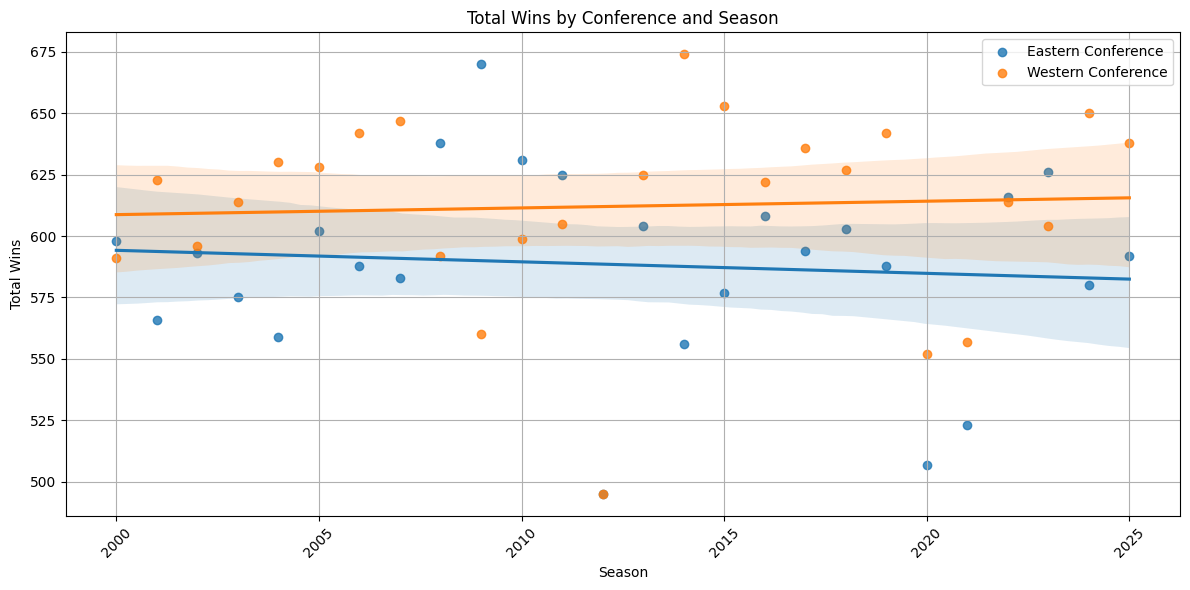

In [37]:
query = """
SELECT tss.season AS season, SUM(tss.wins) AS total_wins, ts.conference AS conference
FROM team_season_stats tss
JOIN teams ts ON tss.team_id = ts.team_id
GROUP BY tss.season, ts.conference
ORDER BY tss.season, ts.conference;
"""

cursor.execute(query)
results = cursor.fetchall()
conference_wins_by_season = [(season, total_wins, conference) for season, total_wins, conference in results]
print("\nTotal Wins by Conference and Season:")
for season, total_wins, conference in results:
    print(f"Season: {season}, Conference: {conference}, Total Wins: {total_wins}")
    
seasons = [season for season, _, conference in conference_wins_by_season if conference == 'Eastern']
total_eastern_wins = [total_wins for _, total_wins, conference in conference_wins_by_season if conference == 'Eastern']
total_western_wins = [total_wins for _, total_wins, conference in conference_wins_by_season if conference == 'Western']
plt.figure(figsize=(12, 6))
sns.regplot(x=seasons, y=total_eastern_wins, marker='o', label='Eastern Conference')
sns.regplot(x=seasons, y=total_western_wins, marker='o', label='Western Conference')
plt.title('Total Wins by Conference and Season')
plt.xlabel('Season')
plt.ylabel('Total Wins')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### 4. Has true shooting efficiency improved differently by conference?



True Shooting Percentage by Season and Conference:
Season: 2000, Conference: Eastern, True Shooting Percentage: 49.22%
Season: 2000, Conference: Western, True Shooting Percentage: 50.02%
Season: 2001, Conference: Eastern, True Shooting Percentage: 48.46%
Season: 2001, Conference: Western, True Shooting Percentage: 50.20%
Season: 2002, Conference: Eastern, True Shooting Percentage: 48.98%
Season: 2002, Conference: Western, True Shooting Percentage: 50.08%
Season: 2003, Conference: Eastern, True Shooting Percentage: 48.26%
Season: 2003, Conference: Western, True Shooting Percentage: 49.07%
Season: 2004, Conference: Eastern, True Shooting Percentage: 49.08%
Season: 2004, Conference: Western, True Shooting Percentage: 49.20%
Season: 2005, Conference: Eastern, True Shooting Percentage: 49.93%
Season: 2005, Conference: Western, True Shooting Percentage: 50.81%
Season: 2006, Conference: Eastern, True Shooting Percentage: 51.40%
Season: 2006, Conference: Western, True Shooting Percentage: 50.

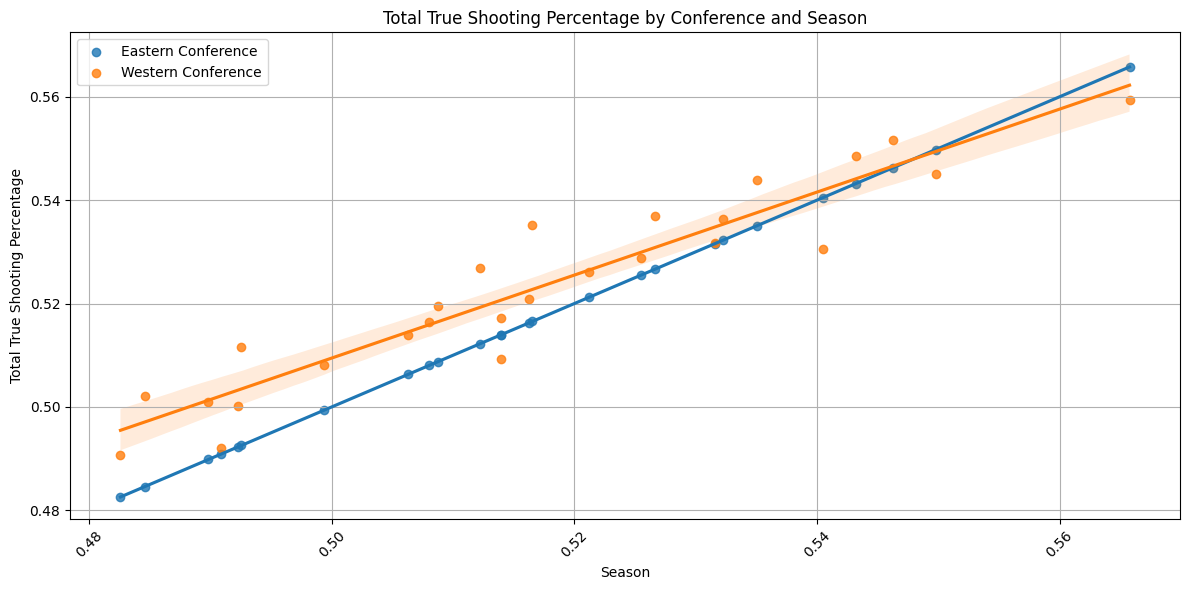

In [53]:
query = """
SELECT AVG(pss.ts_pct) AS avg_true_shooting_percentage, pss.season AS season, ts.conference AS conference
FROM player_season_stats pss
JOIN teams ts ON pss.team_id = ts.team_id
GROUP BY pss.season, ts.conference
ORDER BY pss.season, ts.conference;
"""

cursor.execute(query)
results = cursor.fetchall()
ts_pct_by_season_conference = [(true_shooting_percentage, season, conference) for true_shooting_percentage, season, conference in results]
print("\nTrue Shooting Percentage by Season and Conference:")
for true_shooting_percentage, season, conference in results:
    print(f"Season: {season}, Conference: {conference}, True Shooting Percentage: {true_shooting_percentage:.2%}")
    

seasons = [season for season, _, conference in ts_pct_by_season_conference if conference == 'Eastern']
total_eastern_ts = [ts for ts, _, conference in ts_pct_by_season_conference if conference == 'Eastern']
total_western_ts = [ts for ts, _, conference in ts_pct_by_season_conference if conference == 'Western']
plt.figure(figsize=(12, 6))
sns.regplot(x=seasons, y=total_eastern_ts, marker='o', label='Eastern Conference')
sns.regplot(x=seasons, y=total_western_ts, marker='o', label='Western Conference')
plt.title('Total True Shooting Percentage by Conference and Season')
plt.xlabel('Season')
plt.ylabel('Total True Shooting Percentage')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

### 5. Who led the league in scoring each season, and how has the top PPG trended?


Scoring Leaders by Season:
Season: 2000, Player: Shaquille O'Neal, PPG: 29.7
Season: 2001, Player: Allen Iverson, PPG: 31.1
Season: 2002, Player: Allen Iverson, PPG: 31.4
Season: 2003, Player: Tracy McGrady, PPG: 32.1
Season: 2004, Player: Tracy McGrady, PPG: 28.0
Season: 2005, Player: Allen Iverson, PPG: 30.7
Season: 2006, Player: Kobe Bryant, PPG: 35.4
Season: 2007, Player: Kobe Bryant, PPG: 31.6
Season: 2008, Player: LeBron James, PPG: 30.0
Season: 2009, Player: Dwyane Wade, PPG: 30.2
Season: 2010, Player: Kevin Durant, PPG: 30.1
Season: 2011, Player: Kevin Durant, PPG: 27.7
Season: 2012, Player: Kevin Durant, PPG: 28.0
Season: 2013, Player: Carmelo Anthony, PPG: 28.7
Season: 2014, Player: Kevin Durant, PPG: 32.0
Season: 2015, Player: Russell Westbrook, PPG: 28.1
Season: 2016, Player: Stephen Curry, PPG: 30.1
Season: 2017, Player: Russell Westbrook, PPG: 31.6
Season: 2018, Player: James Harden, PPG: 30.4
Season: 2019, Player: James Harden, PPG: 36.1
Season: 2020, Player: James Hard

/var/folders/p0/lkclhrbx4_v0_99swk42frq80000gn/T/ipykernel_63050/1290119391.py:37: UserWarning: Glyph 141 (\x8d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/p0/lkclhrbx4_v0_99swk42frq80000gn/T/ipykernel_63050/1290119391.py:37: UserWarning: Glyph 135 (\x87) missing from font(s) DejaVu Sans.
  plt.tight_layout()


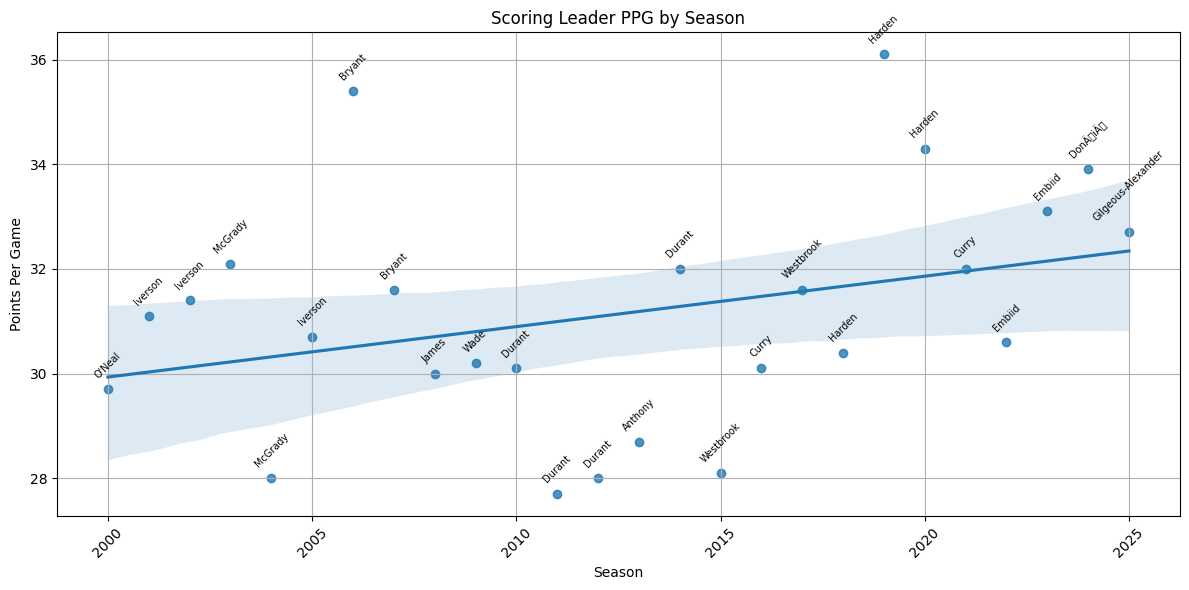

In [66]:
query = """
SELECT pss.season AS season, p.full_name AS player, pss.points AS ppg
FROM player_season_stats pss
JOIN players p ON pss.player_id = p.player_id
WHERE pss.games >= 50
AND pss.points = (
    SELECT MAX(pss2.points)
    FROM player_season_stats pss2
    WHERE pss2.season = pss.season
    AND pss2.games >= 50
)
ORDER BY pss.season;
"""

cursor.execute(query)
results = cursor.fetchall()
scoring_leaders = [(season, player, ppg) for season, player, ppg in results]
print("\nScoring Leaders by Season:")
for season, player, ppg in results:
    print(f"Season: {season}, Player: {player}, PPG: {ppg:.1f}")

seasons = [season for season, _, _ in scoring_leaders]
ppg_values = [ppg for _, _, ppg in scoring_leaders]
player_names = [player for _, player, _ in scoring_leaders]

plt.figure(figsize=(12, 6))
sns.regplot(x=seasons, y=ppg_values, marker='o')
for i, name in enumerate(player_names):
    plt.annotate(name.split()[-1], (seasons[i], ppg_values[i]),
                 textcoords="offset points", xytext=(0, 8),
                 fontsize=7, ha='center', rotation=45)
plt.title('Scoring Leader PPG by Season')
plt.xlabel('Season')
plt.ylabel('Points Per Game')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

### 6. Has competitive balance changed? Which teams sit at the extremes each year?

In [ ]:
query = """
SELECT tss.srs AS srs, tss.season AS season, t.team_name AS team_name
FROM team_season_stats tss
JOIN teams t ON tss.team_id = t.team_id
WHERE tss.srs = (
    SELECT MAX(tss2.srs)
    FROM team_season_stats tss2
    WHERE tss2.season = tss.season
)
ORDER BY tss.season;
"""

cursor.execute(query)
results = cursor.fetchall()
srs_leaders = [(srs, season, team_name) for srs, season, team_name in results]
print("\nSRS Leaders by Season:")
for srs, season, team_name in results:
    print(f"Season: {season}, Team: {team_name}, SRS: {srs:.2f}")


SRS Leaders by Season:
Season: 2000, Team: Los Angeles Lakers, SRS: 8.41
Season: 2001, Team: San Antonio Spurs, SRS: 7.92
Season: 2002, Team: Sacramento Kings, SRS: 7.61
Season: 2003, Team: Dallas Mavericks, SRS: 7.90
Season: 2004, Team: San Antonio Spurs, SRS: 7.51
Season: 2005, Team: San Antonio Spurs, SRS: 7.84
Season: 2006, Team: San Antonio Spurs, SRS: 6.69
Season: 2007, Team: San Antonio Spurs, SRS: 8.35
Season: 2008, Team: Boston Celtics, SRS: 9.30
Season: 2009, Team: Cleveland Cavaliers, SRS: 8.68
Season: 2010, Team: Orlando Magic, SRS: 7.12
Season: 2011, Team: Miami Heat, SRS: 6.76
Season: 2012, Team: Chicago Bulls, SRS: 7.43
Season: 2013, Team: Oklahoma City Thunder, SRS: 9.15
Season: 2014, Team: San Antonio Spurs, SRS: 8.00
Season: 2015, Team: Golden State Warriors, SRS: 10.01
Season: 2016, Team: Golden State Warriors, SRS: 10.38
Season: 2017, Team: Golden State Warriors, SRS: 11.35
Season: 2018, Team: Houston Rockets, SRS: 8.21
Season: 2019, Team: Milwaukee Bucks, SRS: 8.0

In [75]:
query = """
SELECT tss.srs AS srs, tss.season AS season, t.team_name AS team_name
FROM team_season_stats tss
JOIN teams t ON tss.team_id = t.team_id
WHERE tss.srs = (
    SELECT MIN(tss2.srs)
    FROM team_season_stats tss2
    WHERE tss2.season = tss.season
)
ORDER BY tss.season;
"""

cursor.execute(query)
results = cursor.fetchall()
srs_loosers = [(srs, season, team_name) for srs, season, team_name in results]
print("\nSRS Loosers by Season:")
for srs, season, team_name in results:
    print(f"Season: {season}, Team: {team_name}, SRS: {srs:.2f}")


SRS Loosers by Season:
Season: 2000, Team: Los Angeles Clippers, SRS: -10.73
Season: 2001, Team: Chicago Bulls, SRS: -9.09
Season: 2002, Team: Chicago Bulls, SRS: -8.52
Season: 2003, Team: Cleveland Cavaliers, SRS: -9.59
Season: 2004, Team: Orlando Magic, SRS: -7.25
Season: 2005, Team: Atlanta Hawks, SRS: -9.62
Season: 2006, Team: Portland Trail Blazers, SRS: -8.91
Season: 2007, Team: Atlanta Hawks, SRS: -4.86
Season: 2008, Team: Miami Heat, SRS: -8.53
Season: 2009, Team: Sacramento Kings, SRS: -8.60
Season: 2010, Team: Minnesota Timberwolves, SRS: -9.06
Season: 2011, Team: Cleveland Cavaliers, SRS: -8.88
Season: 2012, Team: Charlotte Bobcats, SRS: -13.96
Season: 2013, Team: Charlotte Bobcats, SRS: -9.29
Season: 2014, Team: Philadelphia 76ers, SRS: -10.66
Season: 2015, Team: New York Knicks, SRS: -9.50
Season: 2016, Team: Philadelphia 76ers, SRS: -9.92
Season: 2017, Team: Brooklyn Nets, SRS: -6.74
Season: 2018, Team: Phoenix Suns, SRS: -8.80
Season: 2019, Team: Cleveland Cavaliers, SR

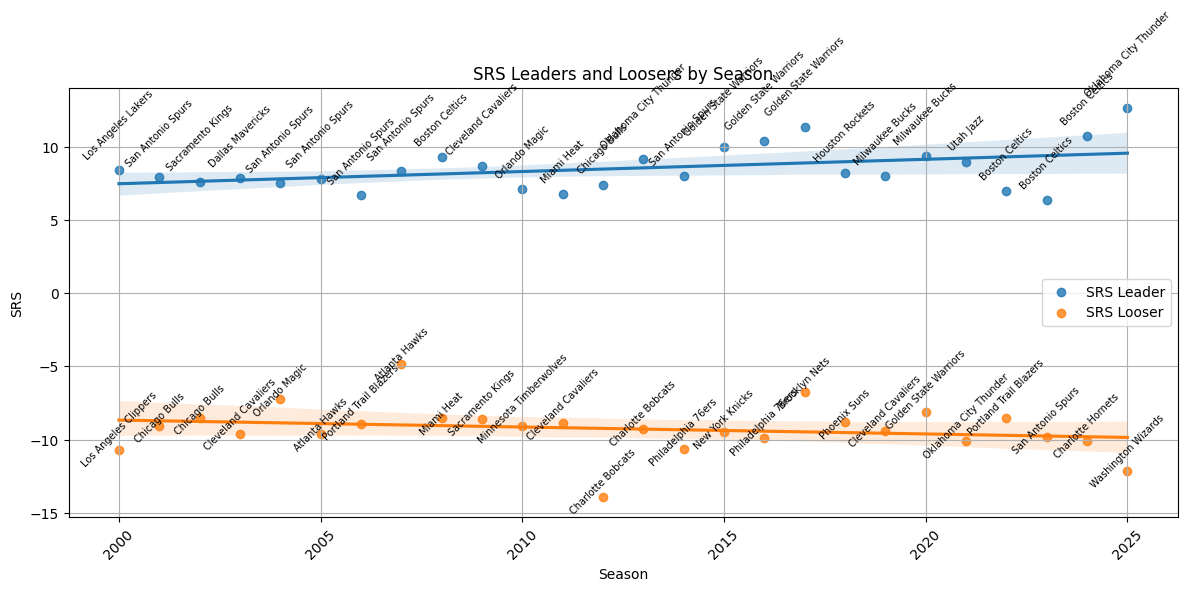

In [ ]:
seasons = [season for _, season, _ in srs_leaders]
srs_values = {}
for season in seasons:
    srs_values[season] = {
        'leader_team': next(team_name for _, s, team_name in srs_leaders if s == season),
        'looser_team': next(team_name for _, s, team_name in srs_loosers if s == season),
        'leader_srs': next(srs for srs, s, _ in srs_leaders if s == season),
        'looser_srs': next(srs for srs, s, _ in srs_loosers if s == season)
    }
    
plt.figure(figsize=(12, 6))
leader_srs_values = [srs_values[season]['leader_srs'] for season in seasons]
looser_srs_values = [srs_values[season]['looser_srs'] for season in seasons]
sns.regplot(x=seasons, y=leader_srs_values, marker='o', label='SRS Leader')
for i, season in enumerate(seasons):
    plt.annotate(srs_values[season]['leader_team'], (seasons[i], leader_srs_values[i]),
                 textcoords="offset points", xytext=(0, 8),
                 fontsize=7, ha='center', rotation=45)
sns.regplot(x=seasons, y=looser_srs_values, marker='o', label='SRS Looser')
for i, season in enumerate(seasons):
    plt.annotate(srs_values[season]['looser_team'], (seasons[i], looser_srs_values[i]),
                 textcoords="offset points", xytext=(0, -12),
                 fontsize=7, ha='center', rotation=45)
plt.title('SRS Leaders and Loosers by Season')
plt.xlabel('Season')
plt.ylabel('SRS')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


### 7. Do top draft picks (1-5) produce more win shares than mid-first-rounders (15-30)?



Average Career Win Shares for Top 30 Draft Picks:
Draft Year: 1982, Pick: 2, Player: Terry Cummings, Avg Win Shares: 0.40
Draft Year: 1983, Pick: 8, Player: Antoine Carr, Avg Win Shares: 0.10
Draft Year: 1983, Pick: 9, Player: Dale Ellis, Avg Win Shares: 0.50
Draft Year: 1984, Pick: 1, Player: Hakeem Olajuwon, Avg Win Shares: 2.90
Draft Year: 1984, Pick: 3, Player: Michael Jordan, Avg Win Shares: 4.75
Draft Year: 1984, Pick: 4, Player: Sam Perkins, Avg Win Shares: 2.75
Draft Year: 1984, Pick: 5, Player: Charles Barkley, Avg Win Shares: 1.90
Draft Year: 1984, Pick: 9, Player: Otis Thorpe, Avg Win Shares: 1.05
Draft Year: 1984, Pick: 11, Player: Kevin Willis, Avg Win Shares: 1.37
Draft Year: 1984, Pick: 14, Player: Michael Cage, Avg Win Shares: 0.70
Draft Year: 1984, Pick: 16, Player: John Stockton, Avg Win Shares: 10.43
Draft Year: 1985, Pick: 1, Player: Patrick Ewing, Avg Win Shares: 2.73
Draft Year: 1985, Pick: 3, Player: Benoit Benjamin, Avg Win Shares: 0.00
Draft Year: 1985, Pick: 

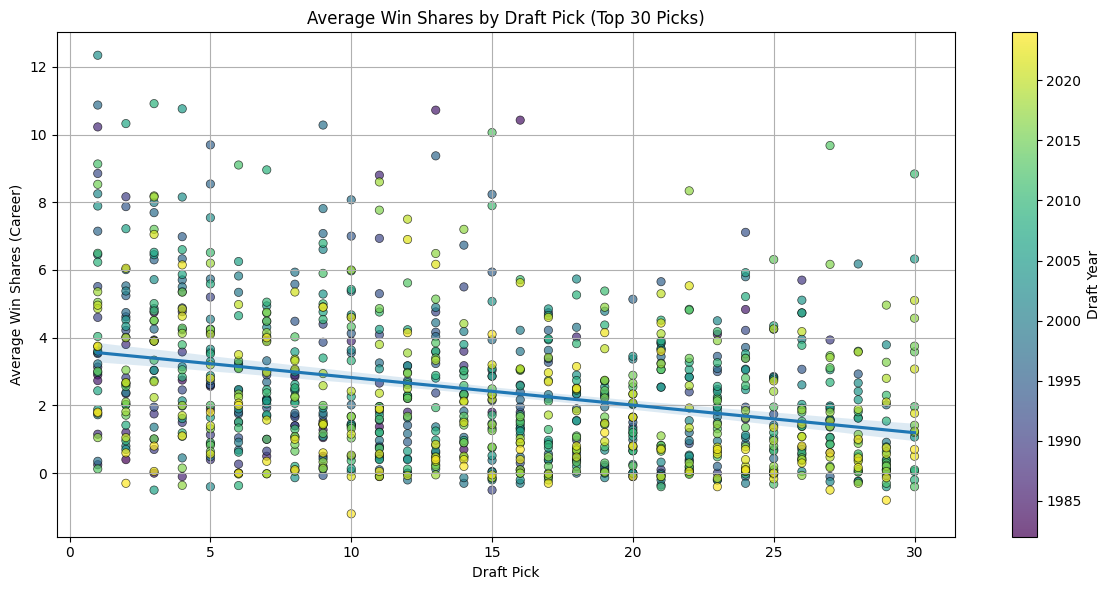

In [ ]:
query = """
SELECT p.full_name AS player_name, AVG(pss.ws) AS avg_win_shares, p.draft_pick AS draft_pick, p.draft_year AS draft_year
FROM player_season_stats pss
JOIN players p ON pss.player_id = p.player_id
WHERE p.draft_round = 1 AND p.draft_pick BETWEEN 1 AND 30
GROUP BY p.full_name, p.draft_pick, p.draft_year
ORDER BY p.draft_year, p.draft_pick;
"""

cursor.execute(query)
results = cursor.fetchall()
draft_win_shares = [(player_name, avg_win_shares, draft_pick, draft_year) for player_name, avg_win_shares, draft_pick, draft_year in results]

print("\nAverage Career Win Shares for Top 30 Draft Picks:")
for player_name, avg_win_shares, draft_pick, draft_year in draft_win_shares:
    print(f"Draft Year: {draft_year}, Pick: {draft_pick}, Player: {player_name}, Avg Win Shares: {avg_win_shares:.2f}")

draft_pick_values = [dp for _, _, dp, _ in draft_win_shares]
win_shares_values = [ws for _, ws, _, _ in draft_win_shares]
draft_year_values = [dy for _, _, _, dy in draft_win_shares]

plt.figure(figsize=(12, 6))
scatter = plt.scatter(draft_pick_values, win_shares_values, c=draft_year_values, cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.5)
plt.colorbar(scatter, label='Draft Year')
sns.regplot(x=draft_pick_values, y=win_shares_values, scatter=False)
plt.title('Average Win Shares by Draft Pick (Top 30 Picks)')
plt.xlabel('Draft Pick')
plt.ylabel('Average Win Shares (Career)')
plt.grid()
plt.tight_layout()
plt.show()

In [123]:
print("Top and Bottom 3 Players by Average Win Shares for Each Draft Pick:")

for draft_pick in range(1, 31):
    pick_data = [(name, ws, dy) for name, ws, dp, dy in draft_win_shares if dp == draft_pick]

    if pick_data:
        sorted_data = sorted(pick_data, key=lambda x: x[1])
        top_3 = sorted_data[-3:][::-1]
        bottom_3 = sorted_data[:3]

        print(f"\nPick #{draft_pick}")
        print("  Top 3 Win Shares:")
        for name, ws, draft_year in top_3:
            print(f"    {name}: {ws:.2f} WS (Draft Year: {draft_year})")
        print("  Bottom 3 Win Shares:")
        for name, ws, draft_year in bottom_3:
            print(f"    {name}: {ws:.2f} WS (Draft Year: {draft_year})")

print("\n" + "=" * 55)

Top and Bottom 3 Players by Average Win Shares for Each Draft Pick:

Pick #1
  Top 3 Win Shares:
    LeBron James: 12.34 WS (Draft Year: 2003)
    Tim Duncan: 10.87 WS (Draft Year: 1997)
    David Robinson: 10.22 WS (Draft Year: 1987)
  Bottom 3 Win Shares:
    Anthony Bennett: 0.12 WS (Draft Year: 2013)
    Pervis Ellison: 0.25 WS (Draft Year: 1989)
    Michael Olowokandi: 0.35 WS (Draft Year: 1998)

Pick #2
  Top 3 Win Shares:
    Kevin Durant: 10.32 WS (Draft Year: 2007)
    Gary Payton: 8.16 WS (Draft Year: 1990)
    Jason Kidd: 7.87 WS (Draft Year: 1994)
  Bottom 3 Win Shares:
    Alex Sarr: -0.30 WS (Draft Year: 2024)
    Terry Cummings: 0.40 WS (Draft Year: 1982)
    Brandon Miller: 0.60 WS (Draft Year: 2023)

Pick #3
  Top 3 Win Shares:
    James Harden: 10.91 WS (Draft Year: 2009)
    Jayson Tatum: 8.19 WS (Draft Year: 2017)
    Luka DonÄiÄ: 8.16 WS (Draft Year: 2018)
  Bottom 3 Win Shares:
    Adam Morrison: -0.50 WS (Draft Year: 2006)
    Benoit Benjamin: 0.00 WS (Draft Ye

### 8. Has load management increased? Track avg games played by player age group over time.

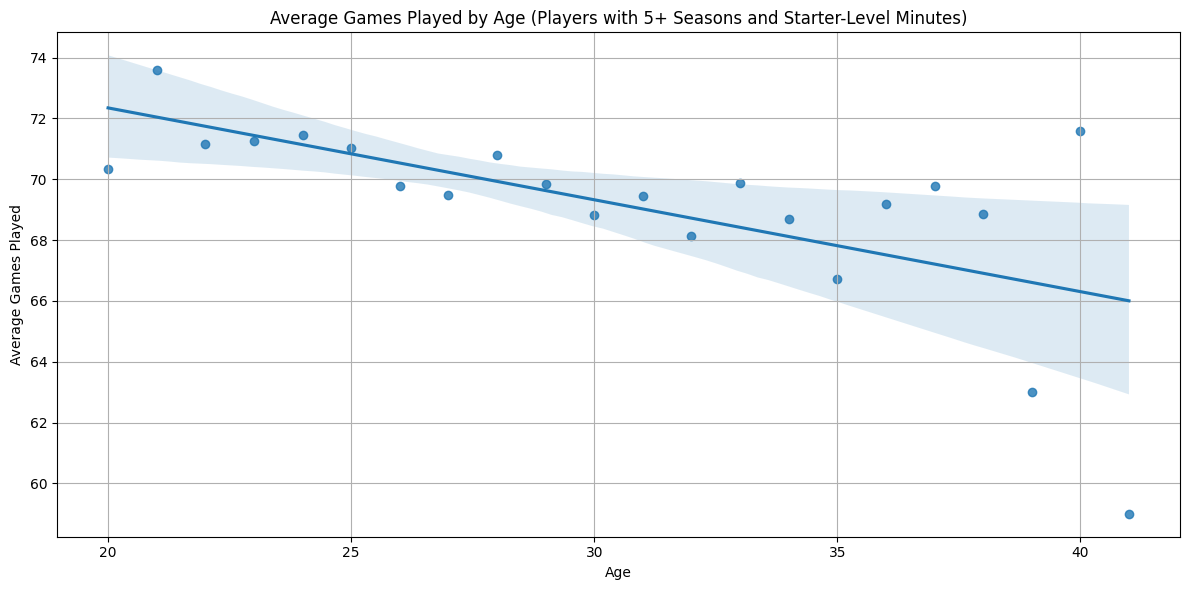

In [143]:
query = """
SELECT p.full_name AS player_name, p.birth_date AS birth_date, pss.games AS games_played, pss.season AS season, pss.minutes AS minutes_played
FROM player_season_stats pss
JOIN players p ON pss.player_id = p.player_id
WHERE pss.games >= 40   -- played enough to not be a mid-season trade/major injury
  AND pss.minutes >= 20 -- starter-level minutes (per game avg) to filter out end-of-roster
  AND p.player_id IN (
      SELECT pss2.player_id
      FROM player_season_stats pss2
      WHERE pss2.games >= 40 AND pss2.minutes >= 20
      GROUP BY pss2.player_id
      HAVING COUNT(pss2.season) >= 5 -- played at least 5 seasons
  )
ORDER BY pss.season, p.full_name;
"""

cursor.execute(query)
results = cursor.fetchall()
player_minutes = [(player_name, birth_date, games_played, season, minutes_played) for player_name, birth_date, games_played, season, minutes_played in results]

games_by_age = {}
for player_name, birth_date, games_played, season, minutes_played in player_minutes:
    birth_year = int(birth_date.split('-')[0])
    season_year = int(season)
    age = season_year - birth_year
    if age not in games_by_age:
        games_by_age[age] = []
    games_by_age[age].append(games_played)

age_groups = sorted(games_by_age.keys())
average_games_by_age = [sum(games_by_age[age]) / len(games_by_age[age]) for age in age_groups]
plt.figure(figsize=(12, 6))
sns.regplot(x=age_groups, y=average_games_by_age, marker='o')
plt.title('Average Games Played by Age (Players with 5+ Seasons and Starter-Level Minutes)')
plt.xlabel('Age')
plt.ylabel('Average Games Played')
plt.grid()
plt.tight_layout()
plt.show()


### 9. Do players on faster-paced teams score more points per game?

Slope: 0.1629


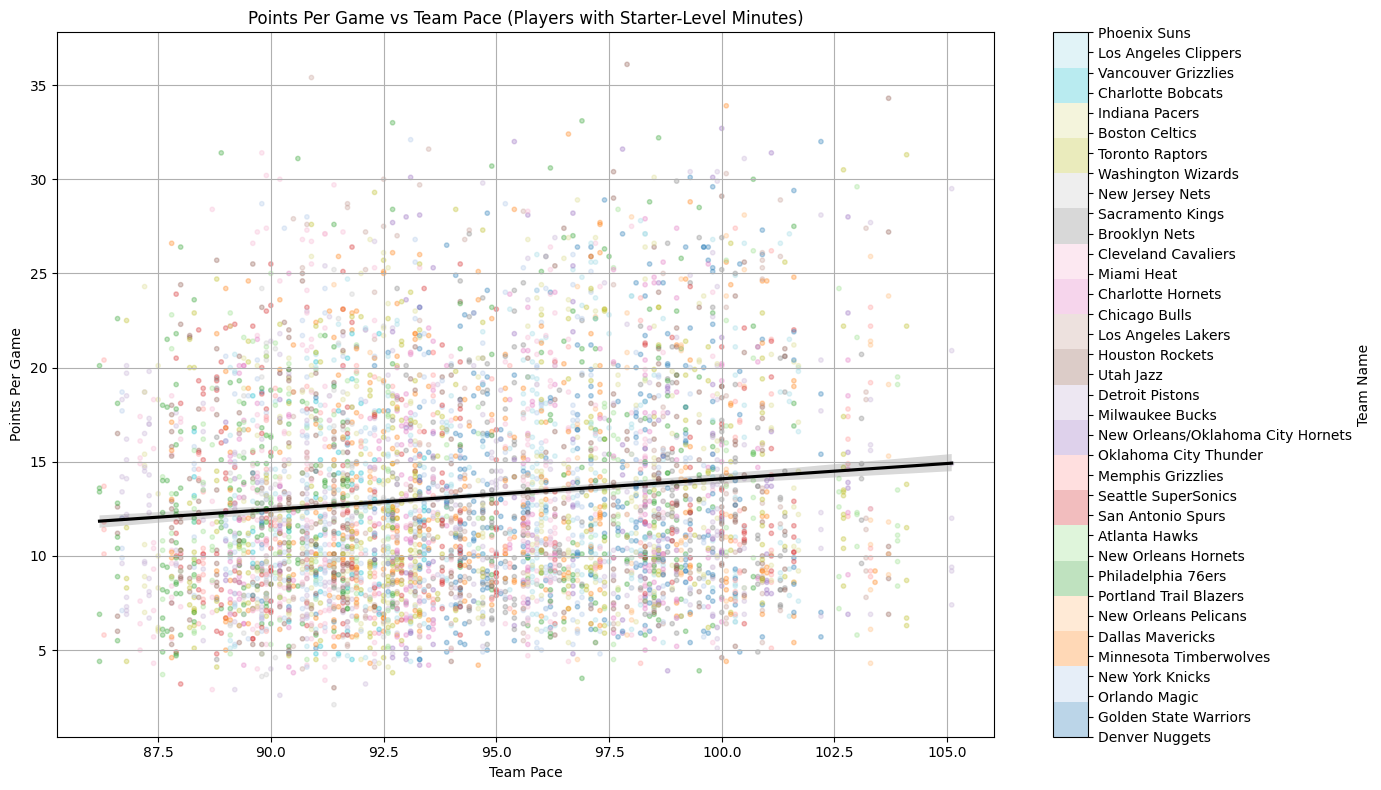

In [159]:
query = """
SELECT p.full_name AS player_name, pss.points AS points_per_game, tss.pace AS team_pace, t.team_name AS team_name, pss.season AS season
FROM player_season_stats pss
JOIN players p ON pss.player_id = p.player_id
JOIN teams t ON pss.team_id = t.team_id
JOIN team_season_stats tss ON pss.team_id = tss.team_id AND pss.season = tss.season
WHERE pss.games >= 40 AND pss.minutes >= 20
ORDER BY pss.season, p.full_name;
"""

cursor.execute(query)
results = cursor.fetchall()
points_pace_data = [(player_name, points_per_game, team_pace, team_name, season) for player_name, points_per_game, team_pace, team_name, season in results]
points_per_game_values = [ppg for _, ppg, _, _, _ in points_pace_data]
team_pace_values = [pace for _, _, pace, _, _ in points_pace_data]
team_names = [team_name for _, _, _, team_name, _ in points_pace_data]

slope, intercept = np.polyfit(team_pace_values, points_per_game_values, 1)
print(f"Slope: {slope:.4f}")


# Encode team names as numeric values
unique_teams = list(set(team_names))
team_to_num = {name: i for i, name in enumerate(unique_teams)}
team_numeric = [team_to_num[name] for name in team_names]

plt.figure(figsize=(14, 8))
scatter = plt.scatter(team_pace_values, points_per_game_values, c=team_numeric, cmap='tab20', alpha=0.3, s=10)
cbar = plt.colorbar(scatter, label='Team Name')
cbar.set_ticks(range(len(unique_teams)))
cbar.set_ticklabels(unique_teams)
sns.regplot(x=team_pace_values, y=points_per_game_values, scatter=False, color='black')
plt.title('Points Per Game vs Team Pace (Players with Starter-Level Minutes)')
plt.xlabel('Team Pace')
plt.ylabel('Points Per Game')
plt.grid()
plt.tight_layout()
plt.show()